In [1]:
pip install fortran-magic

In [2]:
%reload_ext fortranmagic

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [3]:
import py_compile as pyc

In [4]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [5]:
assert ran_the_first_cell, "Oh noes!"

In [6]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [7]:
li = [4, 'three', 8.5, 67, 6.0, "nine"]
li

[4, 'three', 8.5, 67, 6.0, 'nine']

In [8]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [9]:
fir = li[0]
sec = li[1]
print("first:", fir)
print("second:", sec)

first: 4
second: three


In [10]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [11]:
ult = li[-1]
penul = li[-2]
print("last:", ult)
print("second to last:", penul)

last: nine
second to last: 6.0


In [12]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [13]:
otherlist = li[1:3]
otherlist

['three', 8.5]

In [14]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [15]:
fthree = li[:3]
fthree

[4, 'three', 8.5]

In [16]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [17]:
afthree = li[3:]
afthree

[67, 6.0, 'nine']

In [18]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [19]:
li = ['i', 'j', 'k', 'l', 'm', 'n', 'o','p']
li[1:5:2]

['j', 'l']

In [20]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [21]:
li[::-1]

['p', 'o', 'n', 'm', 'l', 'k', 'j', 'i']

In [22]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [23]:
li = [6, 7, 8, 9, 10]
print("Before:", li)
li.append('seven')
print("After:", li)

Before: [6, 7, 8, 9, 10]
After: [6, 7, 8, 9, 10, 'seven']


In [24]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [25]:
li = [6, 7, 8, 9, 10]
[x * 3 for x in li]

[18, 21, 24, 27, 30]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [26]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [27]:
philo = {'Arquimedes': 'Aragon', 'Perfunio': 'Michael Broanson', 'Boris': 'Brejcha'}
philo

{'Arquimedes': 'Aragon', 'Boris': 'Brejcha', 'Perfunio': 'Michael Broanson'}

In [28]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [29]:
philo['Santiago'] = 'Clavijo'
philo

{'Arquimedes': 'Aragon',
 'Boris': 'Brejcha',
 'Perfunio': 'Michael Broanson',
 'Santiago': 'Clavijo'}

In [30]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [31]:
del philo['Santiago']
philo

{'Arquimedes': 'Aragon', 'Boris': 'Brejcha', 'Perfunio': 'Michael Broanson'}

In [32]:
# No slicing. Generate error
#philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [33]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [34]:
c = [[1, 6, 9],
     [2, 5, 0],
     [3, 7, 1],
     [4, 8, 2]]

d = [[4, 5, 6, 7],
     [1, 2, 9, 8]]

In [35]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [36]:
%%time

matmul(a, b)

CPU times: user 27 µs, sys: 5 µs, total: 32 µs
Wall time: 35.3 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [37]:
%%time

matmul(c, d)

CPU times: user 30 µs, sys: 5 µs, total: 35 µs
Wall time: 39.3 µs


[[10, 17, 60, 55], [13, 20, 57, 54], [19, 29, 81, 77], [24, 36, 96, 92]]

In [38]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9718526110161868, 0.5656420517068997, 0.7395910083146361],
 [0.8459521062314068, 0.8921776544028559, 0.6842450393641137]]

In [39]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 6.91 s, sys: 15.5 ms, total: 6.93 s
Wall time: 6.96 s


In [40]:
%%time

randc = random_matrix(500, 200)
randd = random_matrix(200, 500)
x = matmul(randc, randd)

CPU times: user 9.57 s, sys: 20.8 ms, total: 9.59 s
Wall time: 9.61 s


In [41]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [42]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [43]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [44]:
listdata = [float(i) for i in range(100000)]
arraydata = np.array(listdata)

In [45]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 9.32 ms, sys: 7 µs, total: 9.33 ms
Wall time: 9.56 ms


333328333350000.0

In [46]:
%%time
python_dot_product(listdata, listdata)

CPU times: user 13.4 ms, sys: 0 ns, total: 13.4 ms
Wall time: 14.2 ms


333328333350000.0

In [47]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 215 µs, sys: 0 ns, total: 215 µs
Wall time: 407 µs


333328333350000.0

In [48]:
%%time
fortran_dot_product(arraydata, arraydata)

CPU times: user 197 µs, sys: 5 µs, total: 202 µs
Wall time: 247 µs


333328333350000.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [49]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [50]:
mul_elemwise([5, 6, 7, 8], [6, 2 + 6j, 7.9, 'egg'])

[30, (12+36j), 55.300000000000004, 'eggeggeggeggeggeggeggegg']

In [51]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [52]:
source_code = 'c + d * a'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (c)
              2 LOAD_NAME                1 (d)
              4 LOAD_NAME                2 (a)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [53]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [54]:
datos = np.array([9, 8, 7, 6])
datos

array([9, 8, 7, 6])

In [55]:
data + data

array([2, 4, 6, 8])

In [56]:
datos + datos

array([18, 16, 14, 12])

In [57]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 839 µs, sys: 18 µs, total: 857 µs
Wall time: 1.3 ms


333328333350000.0

In [58]:
%%time

(arraydata * arraydata).sum()

CPU times: user 408 µs, sys: 9 µs, total: 417 µs
Wall time: 476 µs


333328333350000.0

In [59]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 4.23 ms, total: 4.23 ms
Wall time: 4.76 ms


333328333350000.0

In [60]:
%%time

arraydata.dot(arraydata)

CPU times: user 0 ns, sys: 415 µs, total: 415 µs
Wall time: 423 µs


333328333350000.0

In [61]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 1.15 ms, total: 1.15 ms
Wall time: 1.32 ms


333328333350000.0

In [62]:
%%time
fortran_dot_product(arraydata, arraydata)

CPU times: user 183 µs, sys: 4 µs, total: 187 µs
Wall time: 196 µs


333328333350000.0

In [63]:
# Numpy won't allow us to write a string into an int array.
#data[0] = "foo"

In [64]:
# We also can't grow an array once it's created.
#data.append(3)

In [65]:
# We **can** reshape an array though.
#two_by_two = data.reshape(2, 2)
#two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [66]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [67]:
arr2 = np.array([14132, 25123, 3135, 45132, 6235, 3416], dtype='int16').reshape(2, 3)
print("Array:\n", arr2, sep='')
print("===========")
print("DType:", arr2.dtype)
print("Shape:", arr2.shape)
print("Strides:", arr2.strides)
print("Data:", arr2.data.tobytes())

Array:
[[ 14132  25123   3135]
 [-20404   6235   3416]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'47#b?\x0cL\xb0[\x18X\r'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [68]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [69]:
data2 = np.arange(15).reshape(3, 5)
data2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [70]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [71]:
data2 * data2

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [72]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [73]:
np.sqrt(data2)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [74]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [75]:
(data2 % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [76]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [77]:
((data2 % 2) == 0) & ((data2 % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [78]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [79]:
data2 @ data2.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [80]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [81]:
senos = np.sin(np.linspace(0, 4.20, 20))
cosenos = np.cos(np.linspace(0, 4.20, 20))
senos

array([ 0.        ,  0.21925676,  0.42784326,  0.6156085 ,  0.77341478,
        0.89358235,  0.97026319,  0.99972558,  0.98053571,  0.91362746,
        0.80225698,  0.65184417,  0.46970896,  0.26471507,  0.04683867,
       -0.17331717, -0.38503842, -0.57802154, -0.74287489, -0.87157577])

In [82]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [83]:
senos[0]

0.0

In [84]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [85]:
senos[:4]

array([0.        , 0.21925676, 0.42784326, 0.6156085 ])

In [86]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [87]:
senos[2:]

array([ 0.42784326,  0.6156085 ,  0.77341478,  0.89358235,  0.97026319,
        0.99972558,  0.98053571,  0.91362746,  0.80225698,  0.65184417,
        0.46970896,  0.26471507,  0.04683867, -0.17331717, -0.38503842,
       -0.57802154, -0.74287489, -0.87157577])

In [88]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [89]:
senos[::5]

array([ 0.        ,  0.89358235,  0.80225698, -0.17331717])

In [90]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [91]:
print("senos:\n", senos)
print("senos > 0.5:\n", senos > 0.5)
print("senos[senos > 0.5]:\n", senos[senos > 0.5])

senos:
 [ 0.          0.21925676  0.42784326  0.6156085   0.77341478  0.89358235
  0.97026319  0.99972558  0.98053571  0.91362746  0.80225698  0.65184417
  0.46970896  0.26471507  0.04683867 -0.17331717 -0.38503842 -0.57802154
 -0.74287489 -0.87157577]
senos > 0.5:
 [False False False  True  True  True  True  True  True  True  True  True
 False False False False False False False False]
senos[senos > 0.5]:
 [0.6156085  0.77341478 0.89358235 0.97026319 0.99972558 0.98053571
 0.91362746 0.80225698 0.65184417]


In [92]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [93]:
print(senos)
senos[[0, 3, 2]]

[ 0.          0.21925676  0.42784326  0.6156085   0.77341478  0.89358235
  0.97026319  0.99972558  0.98053571  0.91362746  0.80225698  0.65184417
  0.46970896  0.26471507  0.04683867 -0.17331717 -0.38503842 -0.57802154
 -0.74287489 -0.87157577]


array([0.        , 0.6156085 , 0.42784326])

In [94]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [95]:
unsorted_data2 = np.array([5, 3, 56, 1, -81, 5, 6])

In [96]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [97]:
sortindices = np.argsort(unsorted_data2)
sortindices

array([4, 3, 1, 0, 5, 6, 2])

In [98]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [99]:
unsorted_data2[sortindices]

array([-81,   1,   3,   5,   5,   6,  56])

In [100]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [101]:
marketcaps = np.array([15, 2, 40, 67, 4]) 
ass = np.array(['F', 'G', 'H', 'I', 'J'])

In [102]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [103]:
sort_by_mcap = np.argsort(marketcaps)
ass[sort_by_mcap]

array(['G', 'J', 'F', 'H', 'I'], dtype='<U1')

In [104]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [105]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [106]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [107]:
dato = np.arange(25).reshape(5, 5)
dato

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [108]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [109]:
dato[:2, :2]

array([[0, 1],
       [5, 6]])

In [110]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [111]:
dato[:3, [1, -2]]

array([[ 1,  3],
       [ 6,  8],
       [11, 13]])

In [112]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [113]:
dato[(dato[:, 0] % 2) == 0]

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [114]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [115]:
variance(np.random.standard_normal(1000))

1.0175335321294061

In [116]:
variance(np.random.standard_normal(5000))

1.0102190197588563

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [117]:
data = np.arange(30)
data.mean()

14.5

In [118]:
data2 = np.arange(20)
data2.mean()

9.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [119]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [120]:
data3 = np.arange(40).reshape(4, 10)
data3

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

In [121]:
data.mean()

14.5

In [122]:
data3.mean()

19.5

In [123]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [124]:
data3.mean(axis=0)

array([15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [125]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [126]:
data3.mean(axis=1)

array([ 4.5, 14.5, 24.5, 34.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [127]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [128]:
row2 = np.array([5, 6, 7, 8])
column2 = np.array([[5], [4], [3]])
print("Row:\n", row2, sep='')
print("Column:\n", column2, sep='')

Row:
[5 6 7 8]
Column:
[[5]
 [4]
 [3]]


In [129]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [130]:
row2 + column2

array([[10, 11, 12, 13],
       [ 9, 10, 11, 12],
       [ 8,  9, 10, 11]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [131]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [132]:
print("Data:\n", data3, sep='')
print("Mean:\n", data3.mean(axis=0), sep='')
print("Data - Mean:\n", data3 - data3.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]]
Mean:
[15. 16. 17. 18. 19. 20. 21. 22. 23. 24.]
Data - Mean:
[[-15. -15. -15. -15. -15. -15. -15. -15. -15. -15.]
 [ -5.  -5.  -5.  -5.  -5.  -5.  -5.  -5.  -5.  -5.]
 [  5.   5.   5.   5.   5.   5.   5.   5.   5.   5.]
 [ 15.  15.  15.  15.  15.  15.  15.  15.  15.  15.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [133]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [134]:
sel = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[6, 7, 8, 9, 10])
sel

a     6
b     7
c     8
d     9
e    10
dtype: int64

In [135]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [136]:
print("The index is:", sel.index)
print("The values are:", sel.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [ 6  7  8  9 10]


In [137]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [138]:
sel.iloc[0]

6

In [139]:
# ... or by label.
s.loc['a']

1

In [140]:
sel.loc['e']

10

In [141]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [142]:
sel.iloc[:2]

a    6
b    7
dtype: int64

In [143]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [144]:
sel.loc[:'d']

a    6
b    7
c    8
d    9
dtype: int64

In [145]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [146]:
sel.iloc[[0, -1]]

a     6
e    10
dtype: int64

In [147]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [148]:
sel.loc[sel > 6]

b     7
c     8
d     9
e    10
dtype: int64

In [149]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [150]:
news = pd.Series({'a': 50.0, 'c': 60.0, 'd': 70.0, 'z': 80.0})
news

a    50.0
c    60.0
d    70.0
z    80.0
dtype: float64

In [151]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [152]:
sel + news

a    56.0
b     NaN
c    68.0
d    79.0
e     NaN
z     NaN
dtype: float64

In [153]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [154]:
(sel + news).fillna(0.0)

a    56.0
b     0.0
c    68.0
d    79.0
e     0.0
z     0.0
dtype: float64

In [155]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [156]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [157]:
aapl.iloc[:3, :3]

,Adj Close,Close,High
Date,,,
2010-01-04,27.613066,30.572857,30.642857
2010-01-05,27.660807,30.625713,30.798571
2010-01-06,27.220825,30.138571,30.747143


In [158]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [159]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Open', 'Close']]

,Open,Close
Date,,
2010-02-01,27.481428,27.818571
2010-02-02,27.987143,27.980000
2010-02-03,27.881428,28.461428
2010-02-04,28.104286,27.435715


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

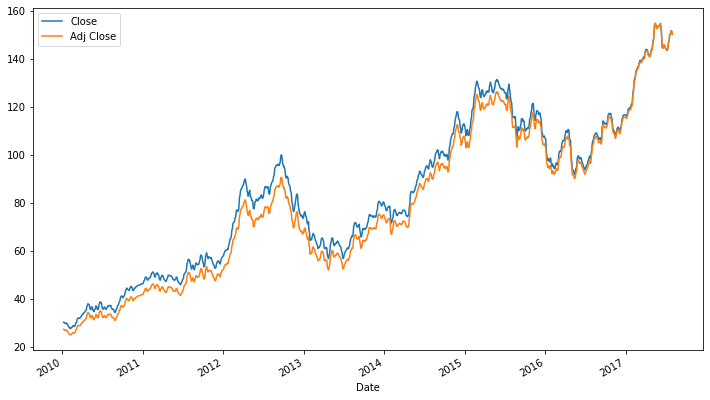

In [160]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

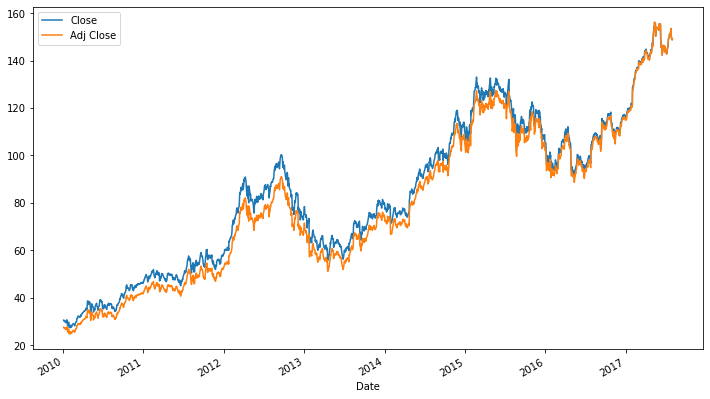

In [161]:
aapl.rolling(1)[['Close', 'Adj Close']].mean().plot();

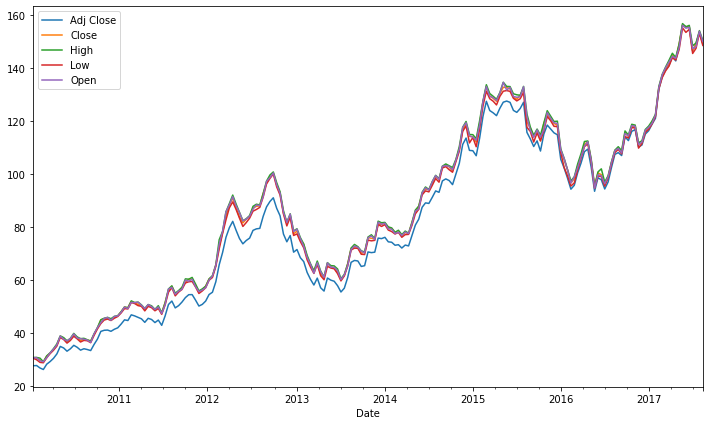

In [162]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

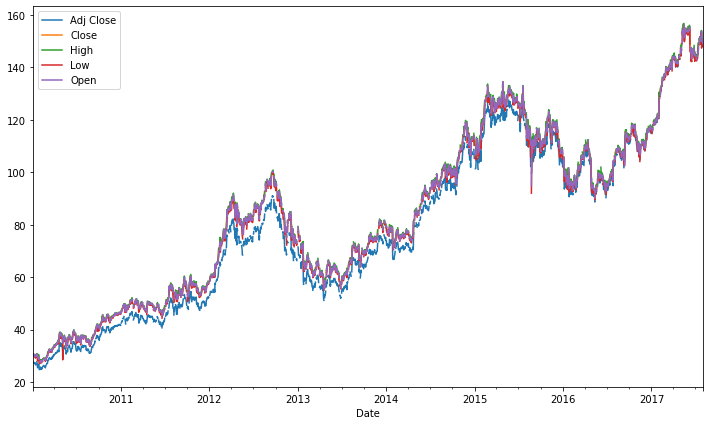

In [163]:
aapl.drop('Volume', axis=1).resample('1D').max().plot();

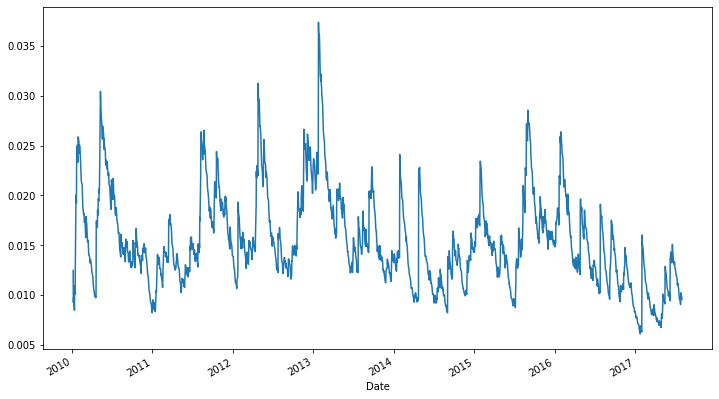

In [164]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

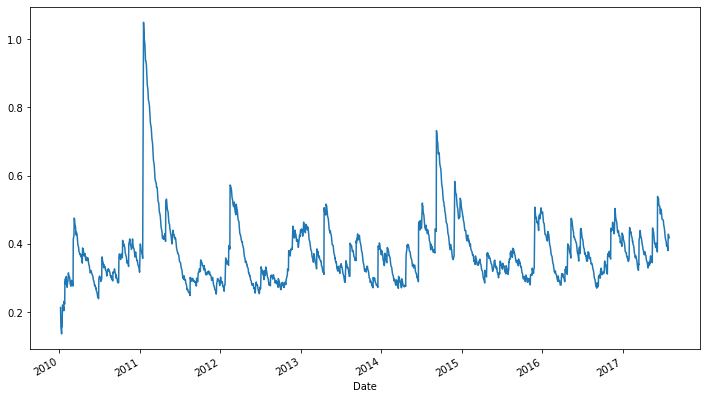

In [165]:
aapl['Volume'].pct_change().ewm(span=50).std().plot();

# "Real World" Data

In [166]:
from content.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [167]:
avocados1 = read_avocadata('2016', '2018')
avocados1.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [168]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [169]:
avocados1.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

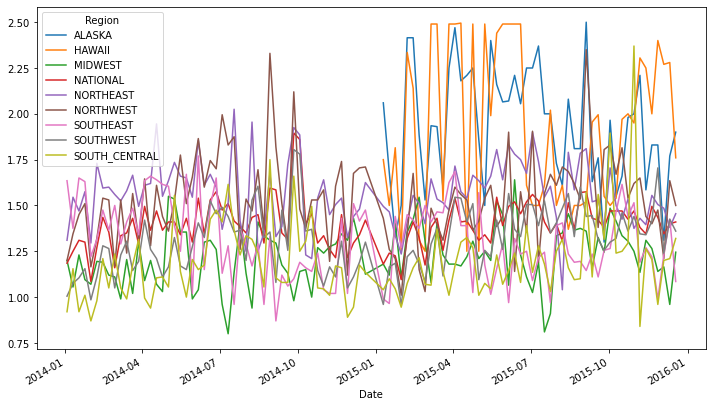

In [170]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

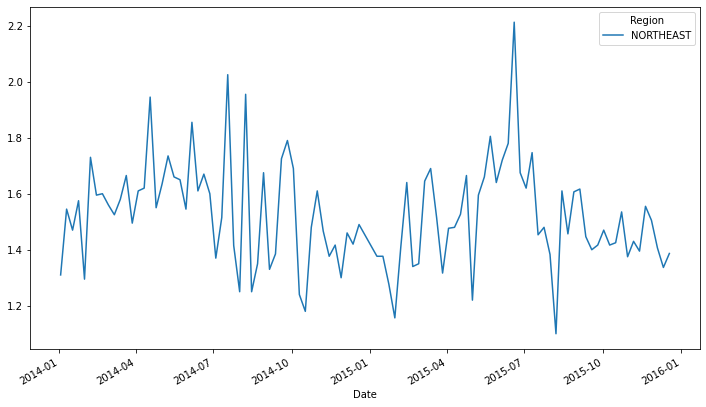

In [171]:
# What's the regional average price of a HASS avocado every day?
region = avocados[avocados.Region == 'NORTHEAST']
region.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [172]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

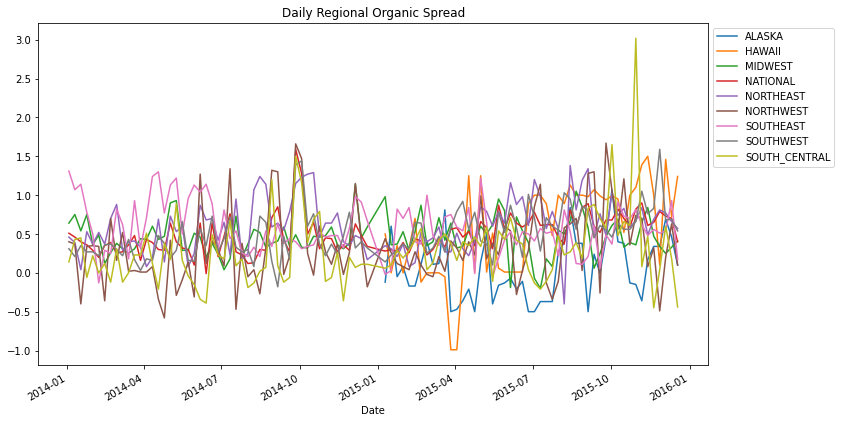

In [173]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [174]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


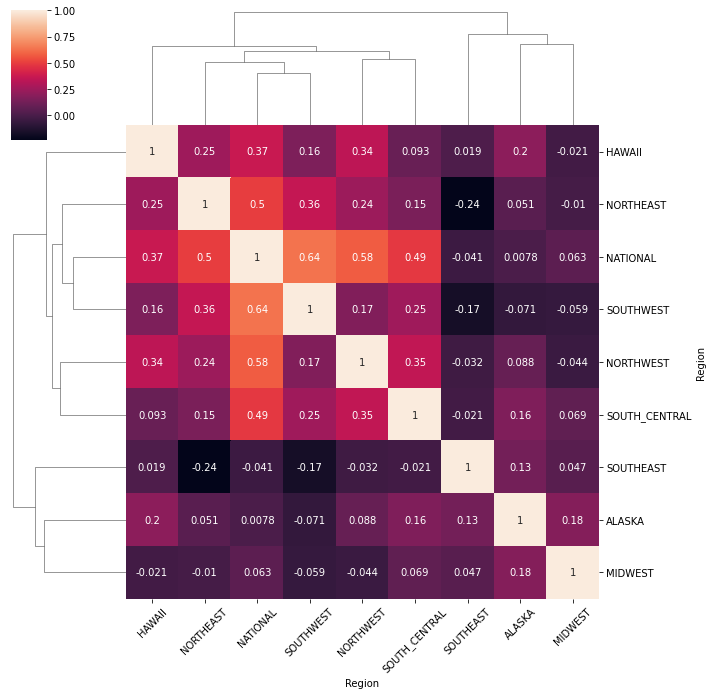

In [175]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!